# **1. Importing Necessary Libraries**

In [25]:
import pandas as pd
import sklearn
import xgboost as xgb
from sklearn.metrics import accuracy_score
from extractFeatures import ExtractFeatures
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Processing the Data**

## **2.1 Transferring data into dataframe**

In [26]:
model = ExtractFeatures()
model.data = model.data.reindex(index=model.data.index[::-1])
model.data.head()

,open,high,low,close,volume
timestamp,,,,,
2022-11-18 18:00:00+00:00,16628.5,16633.0,16541.0,16580.0,18371100.0
2022-11-18 19:00:00+00:00,16580.0,16598.5,16537.5,16556.0,10692500.0
2022-11-18 20:00:00+00:00,16556.0,16659.5,16555.0,16645.0,10884300.0
2022-11-18 21:00:00+00:00,16645.0,16672.5,16602.5,16629.0,9903600.0
2022-11-18 22:00:00+00:00,16629.0,16660.0,16621.5,16647.0,6596400.0


## **2.2 Adding Featues to the dataframe**
### 2.2.1 Exponential Moving Average

In [27]:
# No. of days for taking the exponential moving average
days = [20, 80, 150, 200]
for day in days:
    model.EWMA(day)

model.data.head()

,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200
timestamp,,,,,,,,,
2022-11-18 18:00:00+00:00,16628.5,16633.0,16541.0,16580.0,18371100.0,16580.000000,16580.000000,16580.000000,16580.000000
2022-11-18 19:00:00+00:00,16580.0,16598.5,16537.5,16556.0,10692500.0,16567.400000,16567.850000,16567.920000,16567.940000
2022-11-18 20:00:00+00:00,16556.0,16659.5,16555.0,16645.0,10884300.0,16595.894255,16594.212229,16593.956667,16593.883959
2022-11-18 21:00:00+00:00,16645.0,16672.5,16602.5,16629.0,9903600.0,16605.451372,16603.237990,16602.893491,16602.795091
2022-11-18 22:00:00+00:00,16629.0,16660.0,16621.5,16647.0,6596400.0,16615.501631,16612.433413,16611.951585,16611.813772


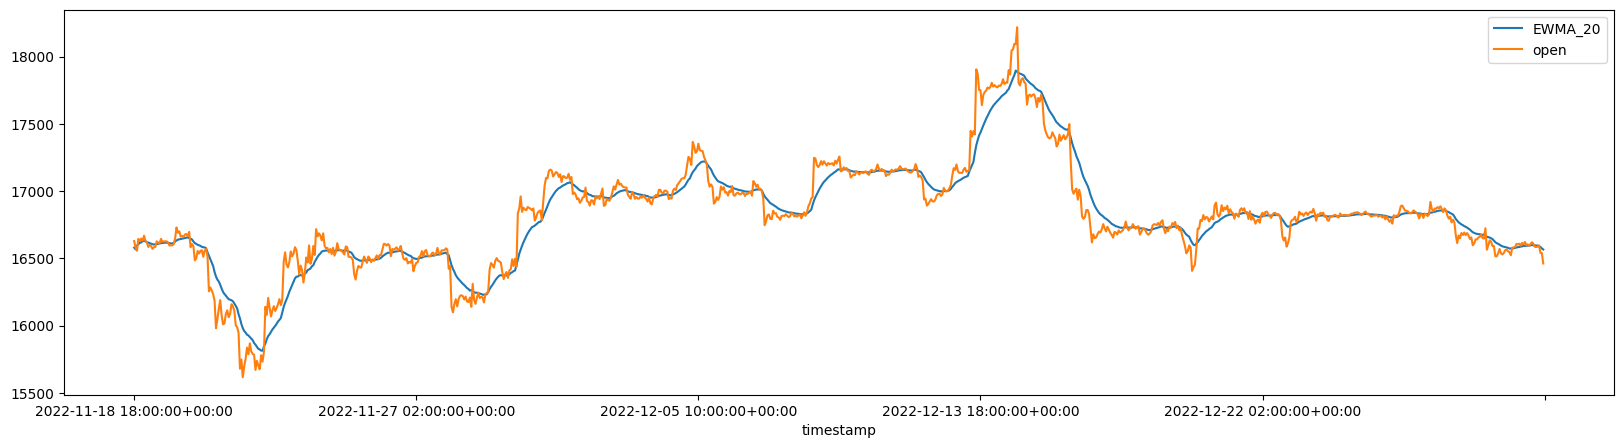

In [28]:
model.data["EWMA_20"].plot(figsize=(20, 5), legend = True)
model.data["open"].plot(figsize=(20, 5),legend = True)
plt.show()

#### 2.2.2 Bolinger Bands

In [29]:
days = 100
model.bbands(days)
model.data.tail()


,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB
timestamp,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859


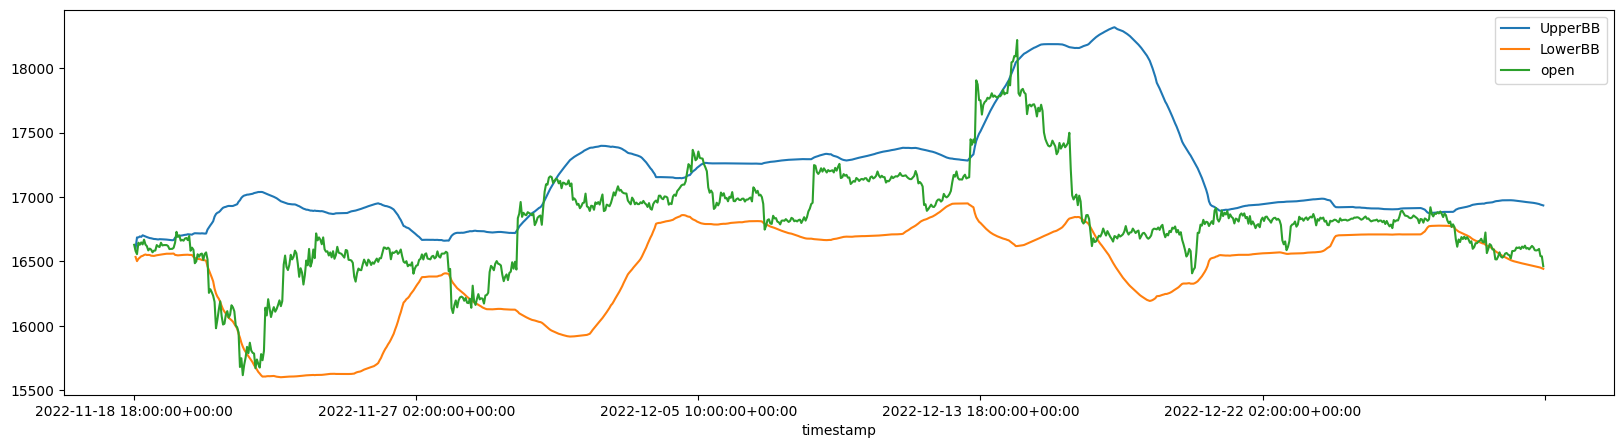

In [30]:
model.data["UpperBB"].plot(figsize=(20, 5),legend = True)
model.data["LowerBB"].plot(figsize=(20, 5),legend = True)
model.data["open"].plot(figsize=(20, 5),legend = True)
plt.show()

### 2.2.3 Commodity Channel Index

In [31]:
days = 20
model.CCI(days)
model.data.tail()


,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI
timestamp,,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298,-40.302701
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290,-202.428482
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501,-176.898391
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825,-226.121741
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859,-168.041313


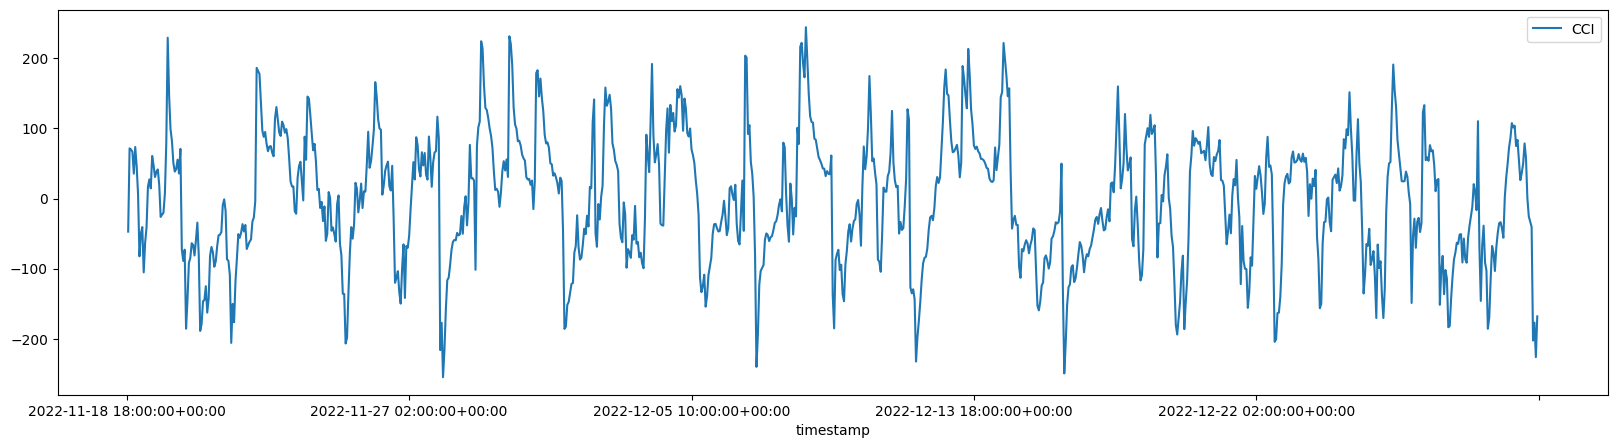

In [32]:
model.data["CCI"].plot(figsize=(20, 5), legend = True)

plt.show()

### 2.2.4 Ease of Movement

In [33]:
days = 14
model.EVM(days)
model.data.tail()

,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI,EVM
timestamp,,,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298,-40.302701,-0.000017
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290,-202.428482,-0.000041
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501,-176.898391,-0.000043
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825,-226.121741,-0.000062
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859,-168.041313,-0.000070


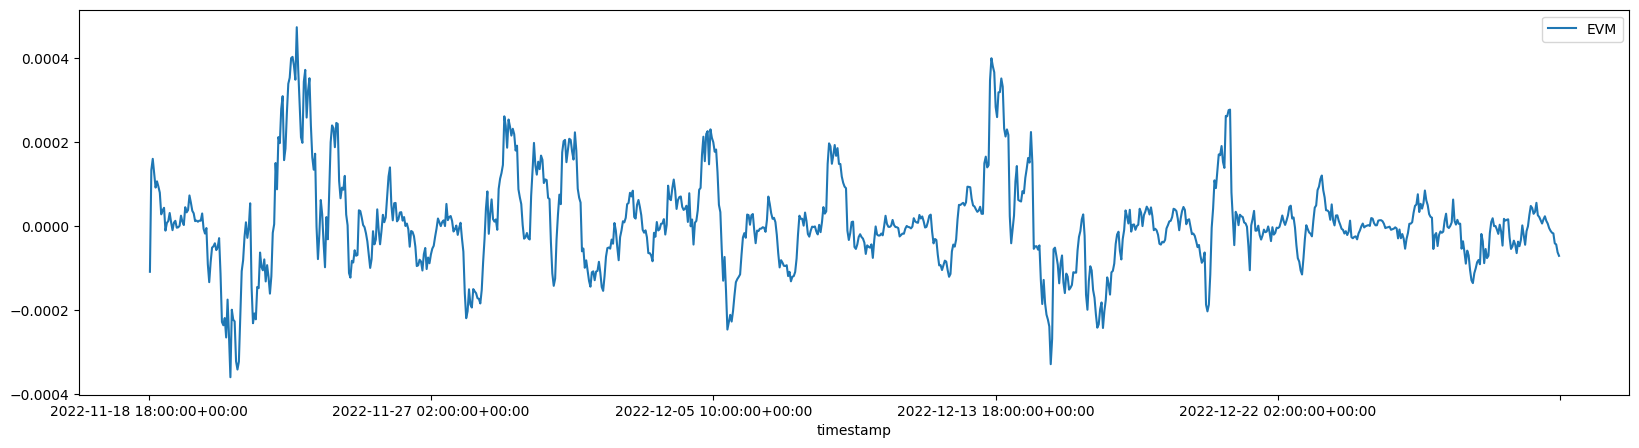

In [34]:
model.data["EVM"].plot(figsize=(20, 5), legend = True)
plt.show()

### 2.2.5 Rate of Change

In [35]:
days = 11
model.ROC(days)
model.data.tail()

,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI,EVM,ROW
timestamp,,,,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298,-40.302701,-0.000017,-0.000482
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290,-202.428482,-0.000041,-0.004903
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501,-176.898391,-0.000043,-0.003615
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825,-226.121741,-0.000062,-0.008552
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859,-168.041313,-0.000070,-0.005966


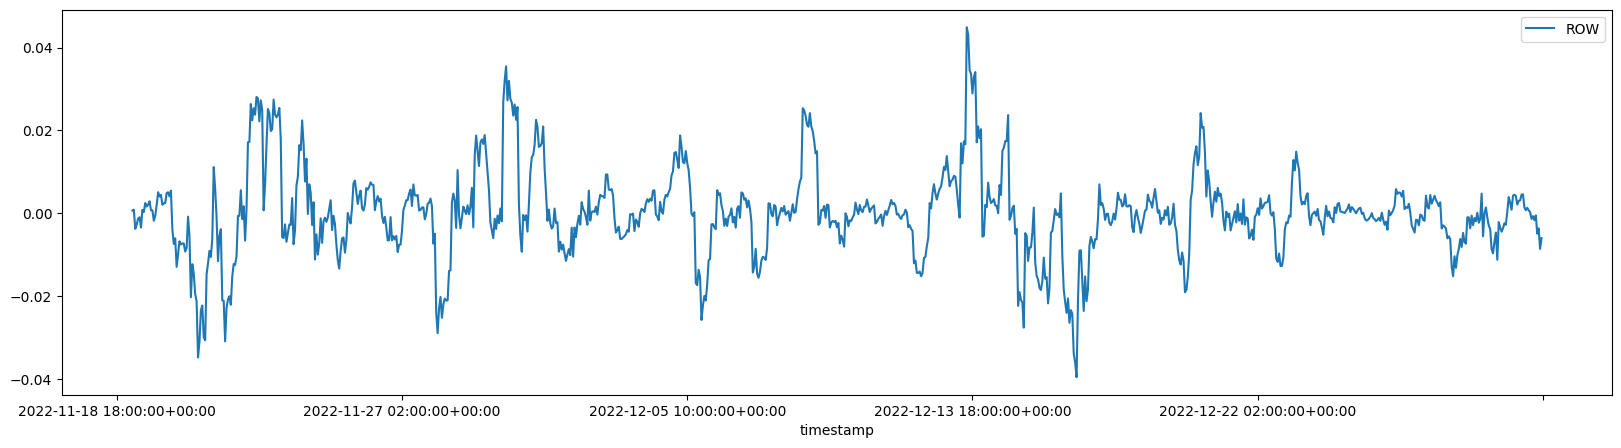

In [36]:
model.data["ROW"].plot(figsize=(20, 5), legend = True)

plt.show()

### 2.2.6 Force Index

In [37]:
days = 10
model.ForceIndex(days)
model.data.tail()

,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI,EVM,ROW,ForceIndex
timestamp,,,,,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298,-40.302701,-0.000017,-0.000482,-6.024630e+07
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290,-202.428482,-0.000041,-0.004903,-6.695150e+08
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501,-176.898391,-0.000043,-0.003615,-3.492450e+08
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825,-226.121741,-0.000062,-0.008552,-2.499899e+09
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859,-168.041313,-0.000070,-0.005966,-6.658412e+08


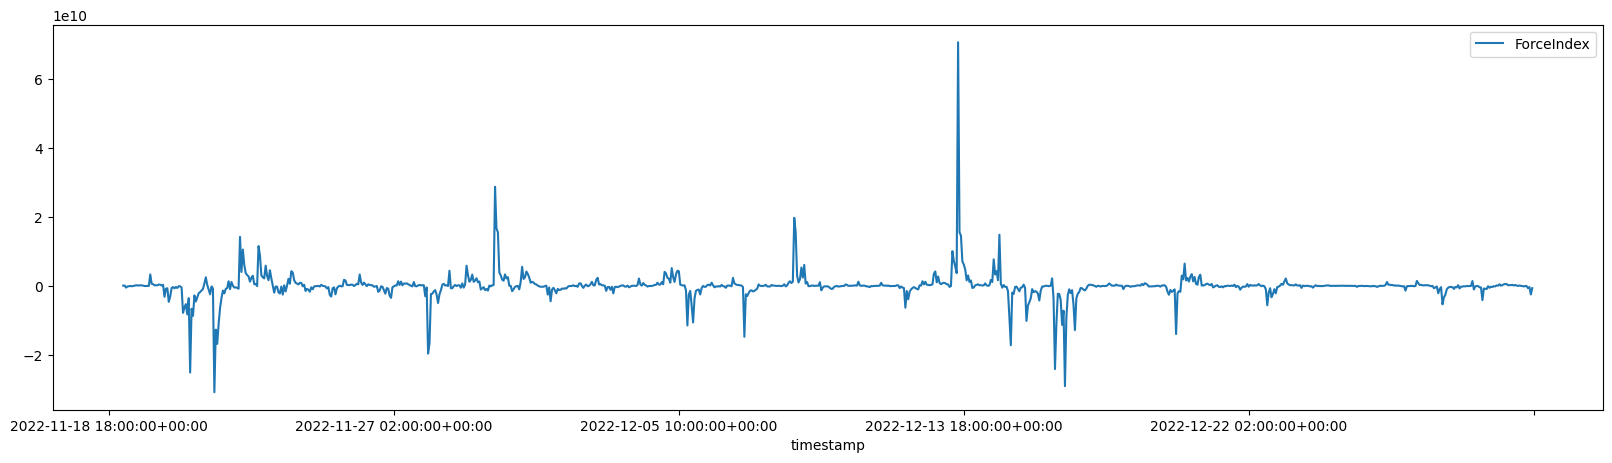

In [38]:
model.data["ForceIndex"].plot(figsize=(20, 5), legend = True)
plt.show()

### 2.2.7 Simple Moving Average

In [39]:
days = [20,]
for day in days:
    model.SMA(day)

model.data.tail()

,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI,EVM,ROW,ForceIndex,SMA_20
timestamp,,,,,,,,,,,,,,,,
2022-12-30 05:00:00+00:00,16587.5,16596.5,16580.0,16596.5,2362600.0,16595.444848,16651.370101,16707.129208,16738.057126,16947.989702,16457.630298,-40.302701,-0.000017,-0.000482,-6.024630e+07,16599.425
2022-12-30 06:00:00+00:00,16596.5,16596.5,16505.5,16540.5,11444700.0,16590.212005,16648.632567,16704.922195,16736.091291,16945.321710,16454.178290,-202.428482,-0.000041,-0.004903,-6.695150e+08,16597.450
2022-12-30 07:00:00+00:00,16540.5,16562.0,16523.0,16539.0,5373000.0,16585.334671,16645.925590,16702.724546,16734.130093,16940.919499,16451.590501,-176.898391,-0.000043,-0.003615,-3.492450e+08,16595.375
2022-12-30 08:00:00+00:00,16539.0,16539.0,16424.0,16462.0,19083200.0,16573.588512,16641.384218,16699.536136,16731.422207,16937.788175,16446.101825,-226.121741,-0.000062,-0.008552,-2.499899e+09,16589.250
2022-12-30 09:00:00+00:00,16462.0,16494.5,16445.5,16494.0,5892400.0,16566.008654,16637.745101,16696.813799,16729.059689,16934.345141,16441.934859,-168.041313,-0.000070,-0.005966,-6.658412e+08,16583.575


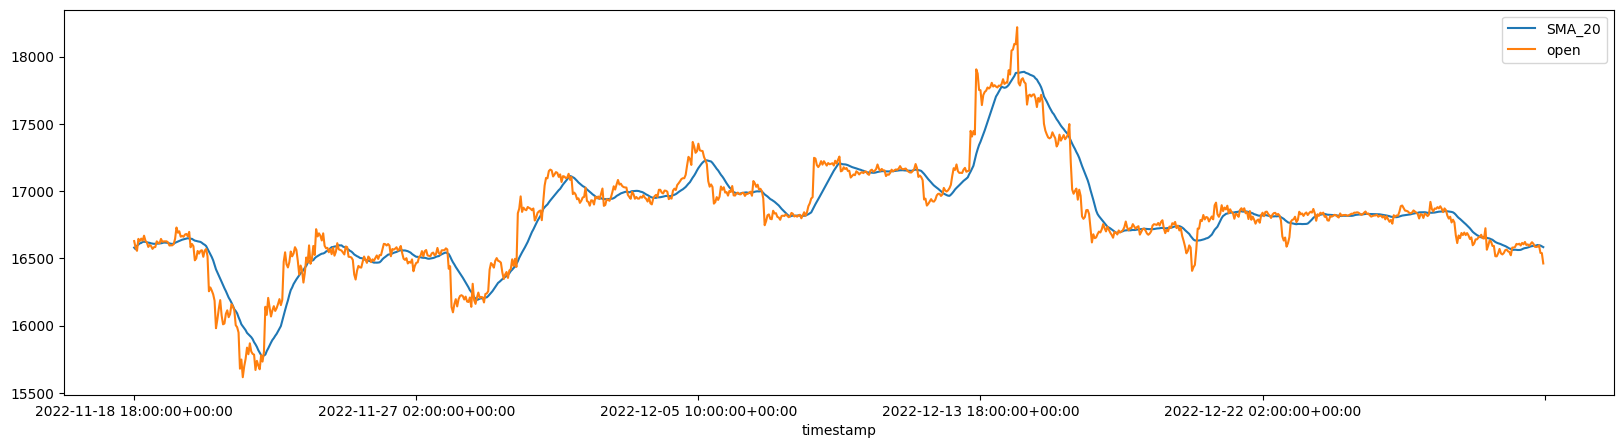

In [40]:
model.data["SMA_20"].plot(figsize=(20, 5), legend = True)
model.data["open"].plot(figsize=(20, 5),legend = True)
plt.show()

### 2.2.8 Normalize the features

In [41]:
model.normalize()
model.data.tail()

/home/atharvat/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


,open,high,low,close,volume,EWMA_20,EWMA_80,EWMA_150,EWMA_200,UpperBB,LowerBB,CCI,EVM,ROW,ForceIndex,SMA_20
984,-0.591338,-0.668052,-0.508127,-0.567417,-0.698927,-0.602496,-0.498492,-0.311238,-0.183087,-0.554195,0.041558,-0.431438,-0.201705,-0.048243,0.004581,-0.580206
985,-0.567804,-0.668052,-0.700363,-0.713818,0.254861,-0.616921,-0.507107,-0.318734,-0.190023,-0.560534,0.032230,-2.229104,-0.415531,-0.473707,-0.143549,-0.585545
986,-0.714234,-0.758695,-0.655207,-0.717740,-0.382779,-0.630366,-0.515626,-0.326198,-0.196943,-0.570993,0.025238,-1.946024,-0.438627,-0.349719,-0.065682,-0.591155
987,-0.718156,-0.819123,-0.910663,-0.919042,1.057044,-0.662745,-0.529919,-0.337026,-0.206497,-0.578432,0.010407,-2.491818,-0.607907,-0.824851,-0.588565,-0.607714
988,-0.919497,-0.936040,-0.855185,-0.835384,-0.328233,-0.683640,-0.541372,-0.346272,-0.214833,-0.586612,-0.000852,-1.847816,-0.683799,-0.576022,-0.142656,-0.623057


## **2.3 Getting the true values - getting Bullish or Bearish trend**
To convert the problem into a classifying problem, consider the following definition:
$$
y_n = o_{n+1} - o_{n}
$$
    
where $o_n$ is the opening price of the $n_{th}$ bucket

In [42]:
X, Y = model.true_values()

### 2.3.2 Splitting the Train and Test data

In [43]:
X_train, X_test, y_train, y_test = model.split_train_test(X,Y)

(790, 16) (790,)
(198, 16) (198,)


### 2.3.3 Training the XGBoost Classifier

In [44]:
XGBmodel = xgb.XGBClassifier()
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## **2.4 Checking the Accuracy of the classifier**

In [45]:
y_pred = XGBmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.79%
